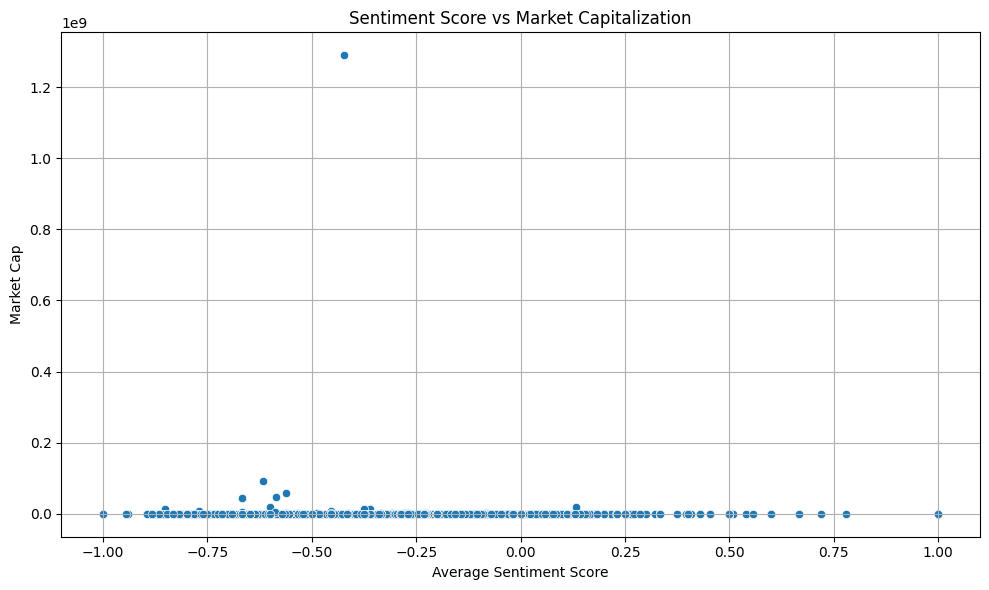

In [1]:
#Visualizing Sentiment vs Market Cap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load merged data (or use your existing DataFrame)
df = pd.read_csv("D:\\NIT_Trichy Project\\Sentiment_Analysis\\sentiment_vs_finance.csv")

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="sentiment_score", y="mCap")
plt.title("Sentiment Score vs Market Capitalization")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Market Cap")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Load your dataset
df = pd.read_csv("comments_with_sentiment.csv")

# Drop rows missing critical info
df = df.dropna(subset=["user_name", "token_ticker"])

# Total comments per token
comment_counts = df.groupby("token_ticker")["comment_id"].count().reset_index()
comment_counts.columns = ["token_ticker", "total_comments"]

# Unique users per token
unique_users = df.groupby("token_ticker")["user_name"].nunique().reset_index()
unique_users.columns = ["token_ticker", "unique_users"]

# Merge and compute engagement
engagement_df = pd.merge(comment_counts, unique_users, on="token_ticker")
engagement_df["comments_per_user"] = engagement_df["total_comments"] / engagement_df["unique_users"]

# Calculate z-scores and flag anomalies
engagement_df["z_score_comments_per_user"] = zscore(engagement_df["comments_per_user"])
engagement_df["anomaly"] = engagement_df["z_score_comments_per_user"].apply(
    lambda x: "High" if x > 2 else ("Low" if x < -2 else "Normal")
)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.barplot(data=engagement_df.sort_values("comments_per_user", ascending=False),
            x="token_ticker", y="comments_per_user", hue="anomaly", dodge=False)
plt.xticks(rotation=90)
plt.title("Community Engagement (Comments per User) by Token")
plt.xlabel("Token Ticker")
plt.ylabel("Comments per User")
plt.tight_layout()
plt.show()

